## Multiclass Classification: Fashion-MNIST database of fashion articles
https://keras.io/datasets/

** Dataset Information: **

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images

** Attribute Information: (784 features and 1 class) **

- 28x28 grayscale images
- 10 fashion categories (
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
)

** Objective of this project **

predict the fashion categories from images

## Data

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
%matplotlib inline  

Using TensorFlow backend.


In [3]:
# Load Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


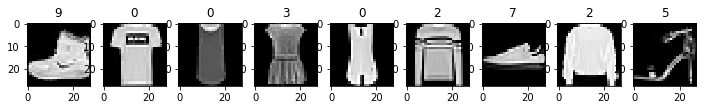

In [5]:
# plot tje first 9 images
plt.figure(figsize=(12,6))
for i in range(0, 9):
    plt.subplot(190 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [6]:
# 10 digits
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000], dtype=int64))

## Baseline MLP model

In [7]:
# Data preprocessing
from keras.utils.np_utils import to_categorical
seed = 101 #random seed for reproducibility
np.random.seed(seed)

# flatten 28*28 images to a 784 vector
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [8]:
# Import libraries
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense

# define the model
def create_model():   
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model
# build the model
model = create_model()
# train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=10, batch_size=200, verbose=2)

# evaluate model on train set
scores = model.evaluate(X_train,y_train,verbose=0)
print('loss of train set: {:0.3f}'.format(scores[0]))
print('accuracy of train set: {:0.1f}%'.format(scores[1]*100))
# evaluate model on test data
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.5105 - acc: 0.8212 - val_loss: 0.4386 - val_acc: 0.8450
Epoch 2/10
 - 10s - loss: 0.3764 - acc: 0.8666 - val_loss: 0.3875 - val_acc: 0.8630
Epoch 3/10
 - 10s - loss: 0.3399 - acc: 0.8763 - val_loss: 0.3660 - val_acc: 0.8663
Epoch 4/10
 - 10s - loss: 0.3106 - acc: 0.8870 - val_loss: 0.3495 - val_acc: 0.8755
Epoch 5/10
 - 10s - loss: 0.2884 - acc: 0.8940 - val_loss: 0.3404 - val_acc: 0.8789
Epoch 6/10
 - 10s - loss: 0.2725 - acc: 0.9003 - val_loss

## CNN

In [10]:
from keras.utils.np_utils import to_categorical

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Data preprocessing
# reshape to [samples][width][height][pixels]
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [11]:
# Import libraries
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

K.clear_session()
np.random.seed(seed)

# define the model
def create_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(28, 28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model
# build the model
model = create_model()

# train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=10, batch_size=200, verbose=2)

# evaluate model on train set
scores = model.evaluate(X_train,y_train,verbose=0)
print('loss of train set: {:0.3f}'.format(scores[0]))
print('accuracy of train set: {:0.1f}%'.format(scores[1]*100))
# evaluate model on test data
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
__________